# AI Matching Consistency Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

from sentence_transformers import SentenceTransformer

import os, sys
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from matcher import read_files, resume_to_job_analysis

## Read Files

In [3]:
resume_path = '../data/resumes/master_resumes.jsonl'
job_postings_path = '../data/job_postings/training_data.csv'

resumes, job_postings = read_files(resume_path, job_postings_path)

## Resume-to-Job Scoring Analysis

In [5]:
models = {'all-MiniLM-L6-v2': SentenceTransformer('all-MiniLM-L6-v2'),
          'all-MiniLM-L12-v2': SentenceTransformer('all-MiniLM-L12-v2'),
          'paraphrase-MiniLM-L6-v2': SentenceTransformer('paraphrase-MiniLM-L6-v2')}

df = resume_to_job_analysis(resumes[0:200], job_postings[0:5], models)
print(df)

    job_posting      resume  similarity_score               model_name
0         job_0   resume_12          0.493402         all-MiniLM-L6-v2
1         job_0   resume_80          0.424083         all-MiniLM-L6-v2
2         job_0   resume_28          0.388464         all-MiniLM-L6-v2
3         job_0   resume_20          0.379641         all-MiniLM-L6-v2
4         job_0   resume_16          0.365597         all-MiniLM-L6-v2
..          ...         ...               ...                      ...
145       job_4   resume_12          0.267149  paraphrase-MiniLM-L6-v2
146       job_4  resume_151          0.263981  paraphrase-MiniLM-L6-v2
147       job_4   resume_83          0.262380  paraphrase-MiniLM-L6-v2
148       job_4   resume_75          0.250104  paraphrase-MiniLM-L6-v2
149       job_4   resume_26          0.249087  paraphrase-MiniLM-L6-v2

[150 rows x 4 columns]


## Similarity Score Variance

In [8]:
var_df = df.groupby('model_name')['similarity_score'].agg(['var', 'std', 'mean'])
var_df = var_df.sort_values('var', ascending=False)
print(var_df)

                              var       std      mean
model_name                                           
all-MiniLM-L12-v2        0.008533  0.092374  0.312148
paraphrase-MiniLM-L6-v2  0.008120  0.090110  0.357004
all-MiniLM-L6-v2         0.005038  0.070981  0.318125


## Top Candidate Overlap

### Top 3 Candidates

In [10]:
jobs = df['job_posting'].unique()

for job in jobs:
    job_df = df[df['job_posting'] == job]
    
    model_0 = job_df[job_df['model_name'] == 'all-MiniLM-L6-v2'].head(3)
    model_1 = job_df[job_df['model_name'] == 'all-MiniLM-L12-v2'].head(3)
    model_2 = job_df[job_df['model_name'] == 'paraphrase-MiniLM-L6-v2'].head(3)

    resumes_0 = model_0['resume'].tolist()
    resumes_1 = model_1['resume'].tolist()
    resumes_2 = model_2['resume'].tolist()

    model_0_1 = [res for res in resumes_0 if res in resumes_1]
    model_0_2 = [res for res in resumes_0 if res in resumes_2]
    model_1_2 = [res for res in resumes_1 if res in resumes_2]
    model_0_1_2 = [res for res in model_0_1 if res in model_1_2]

    print(f'{job}: Top 3 Candidates')
    print(f'  Model 0 and Model 1:           {model_0_1}')
    print(f'  Model 0 and Model 2:           {model_0_2}')
    print(f'  Model 1 and Model 2:           {model_1_2}')
    print(f'  Model 0, Model 1, and Model 2: {model_0_1_2}')
    print()

job_0: Top 3 Candidates
  Model 0 and Model 1:           []
  Model 0 and Model 2:           []
  Model 1 and Model 2:           []
  Model 0, Model 1, and Model 2: []

job_1: Top 3 Candidates
  Model 0 and Model 1:           ['resume_127']
  Model 0 and Model 2:           []
  Model 1 and Model 2:           []
  Model 0, Model 1, and Model 2: []

job_2: Top 3 Candidates
  Model 0 and Model 1:           []
  Model 0 and Model 2:           []
  Model 1 and Model 2:           []
  Model 0, Model 1, and Model 2: []

job_3: Top 3 Candidates
  Model 0 and Model 1:           []
  Model 0 and Model 2:           []
  Model 1 and Model 2:           ['resume_134', 'resume_7']
  Model 0, Model 1, and Model 2: []

job_4: Top 3 Candidates
  Model 0 and Model 1:           []
  Model 0 and Model 2:           []
  Model 1 and Model 2:           ['resume_192', 'resume_162']
  Model 0, Model 1, and Model 2: []



### Top 10 Candidates

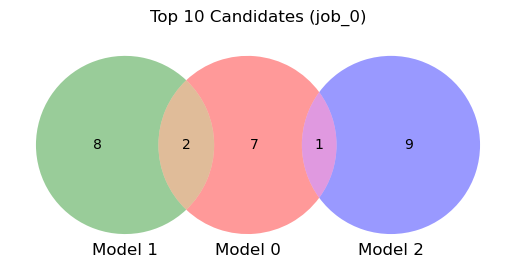

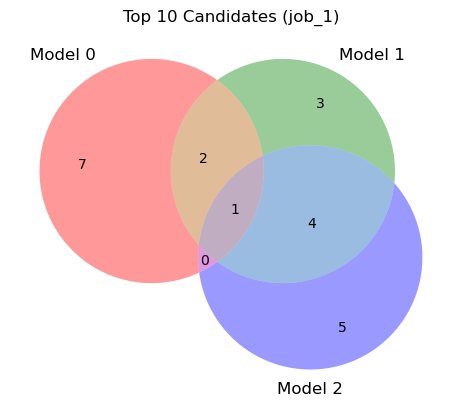

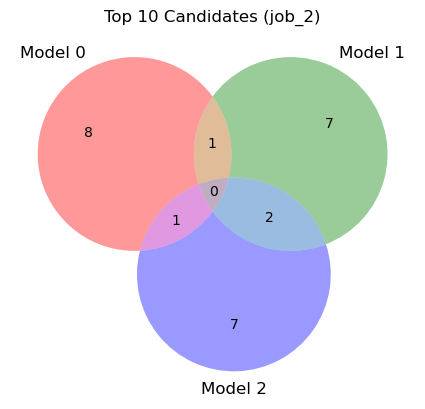

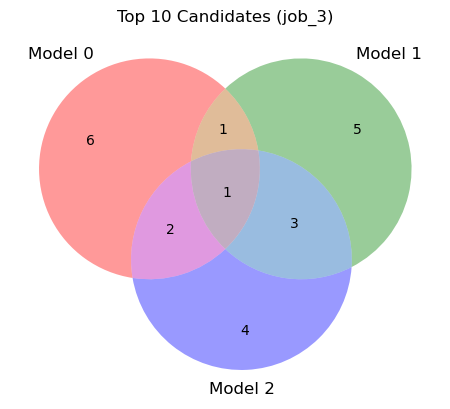

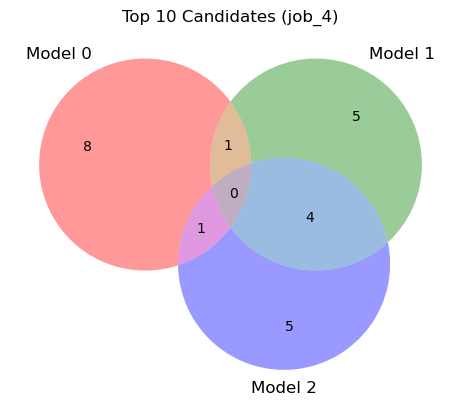

In [12]:
jobs = df['job_posting'].unique()

for job in jobs:
    job_df = df[df['job_posting'] == job]

    model_0 = job_df[job_df['model_name'] == 'all-MiniLM-L6-v2'].head(10)
    model_1 = job_df[job_df['model_name'] == 'all-MiniLM-L12-v2'].head(10)
    model_2 = job_df[job_df['model_name'] == 'paraphrase-MiniLM-L6-v2'].head(10)

    r0 = set(model_0['resume'])
    r1 = set(model_1['resume'])
    r2 = set(model_2['resume'])

    venn3([r0, r1, r2], set_labels=('Model 0', 'Model 1', 'Model 2'))
    plt.title(f'Top 10 Candidates ({job})')

    plt.show()

### END